In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import  silhouette_score

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

In [6]:
df = pd.read_csv("uber-trip-data/uber-raw-data-sep14.csv")
df.head()

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

In [7]:
print('Nombre de lignes : {}'.format(df.shape[0]))
print('Aperçu du dataset : ')
print(df.head())
print()
print('Statistiques basiques : ')
print(df.describe())
print()
print('Pourcentage de valeurs manquantes : ')
print()
print((df.isna().sum()/df.shape[0]*100))

Nombre de lignes : 1028136
Aperçu du dataset : 
          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

Statistiques basiques : 
                Lat           Lon
count  1.028136e+06  1.028136e+06
mean   4.073922e+01 -7.397182e+01
std    4.082861e-02  5.831413e-02
min    3.998970e+01 -7.477360e+01
25%    4.072040e+01 -7.399620e+01
50%    4.074180e+01 -7.398310e+01
75%    4.076120e+01 -7.396280e+01
max    4.134760e+01 -7.271630e+01

Pourcentage de valeurs manquantes : 

Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64


In [8]:
df['Date/Time']= pd.to_datetime(df['Date/Time'])
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [9]:
df['DayOfWeek'] = df['Date/Time'].dt.dayofweek
df['Day'] = df['Date/Time'].dt.day
df['Hour'] = df['Date/Time'].dt.hour
df.drop(['Date/Time', 'Base'], axis=1, inplace = True)

In [10]:
df.head()

Lat      Lon  DayOfWeek  Day  Hour
0  40.2201 -74.0021          0    1     0
1  40.7500 -74.0027          0    1     0
2  40.7559 -73.9864          0    1     0
3  40.7450 -73.9889          0    1     0
4  40.8145 -73.9444          0    1     0

In [11]:
# Sample of my dataset in order to reduce the size
df_sample = df.sample(50000)

In [12]:
# Map geo postion by day of week without clustering, so all the noise is include
fig = px.scatter_mapbox(
        df_sample,
        lat="Lat",
        lon="Lon",
        color="DayOfWeek",
        mapbox_style="carto-positron"
)

fig.show()

### Normalize dataset

In [13]:
# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(df_sample)

# Visualize first five rows
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[-1.13721388,  0.03970636,  1.04583274, -0.30864596,  0.47839226],
       [-0.20353281, -0.40279272, -0.49938274, -1.49483337,  1.48560454],
       [ 0.85086163,  1.69056834, -1.01445456, -0.78312093, -0.86455745],
       [-1.60282264,  0.68303196, -1.52952638, -0.90173967,  0.81412969],
       [ 3.05572852,  0.76642602,  0.01568909,  1.11477893, -1.03242616]])

Apply K-Means 🚀🚀

In [14]:
# Let's create a loop that will collect the Within-sum-of-square (wcss) for each value K
# Let's use .inertia_ parameter to get the within sum of square value for each value K
wcss =  []
k = []
for i in range (1,11):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=1 --> 250000.0000000002


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=2 --> 211911.90881907934


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=3 --> 186855.31757468864


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=4 --> 161854.9366848247


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=5 --> 142459.02544435617


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=6 --> 131129.08144652267


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=7 --> 121199.08076116921


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=8 --> 113472.12684292332


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=9 --> 107228.69663163456


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



WCSS for K=10 --> 101343.26927836199


In [15]:
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

In [16]:
# Computer mean silhouette score
sil = []
k = []

## Careful, i need to start at i=2 as silhouette score cannot accept less than 2 labels
for i in range (2,11):
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=2 is 0.17359877090653036


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=3 is 0.19762407782443045


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=4 is 0.1888450927766829


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=5 is 0.20245105963745438


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=6 is 0.2047745854164195


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=7 is 0.1962169262345793


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=8 is 0.20069686003512466


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=9 is 0.20299495244230675


c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette score for K=10 is 0.2004752653561949


In [17]:
# Create a data frame
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,
             x=k,
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)


In [18]:
# Instanciate KMeans with k=6 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence
kmeans = KMeans(n_clusters=6, random_state=0, init="k-means++")

# Fit kmeans to our dataset
kmeans.fit(X)

c:\Users\nicol\miniconda3\envs\data_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6, random_state=0)

In [19]:
# Cluster centers coordinates
# Let's use inverse transform to have the real coordinates
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

# Let's get column names to facilita understanding
labels = df_sample.columns

<Axes: >

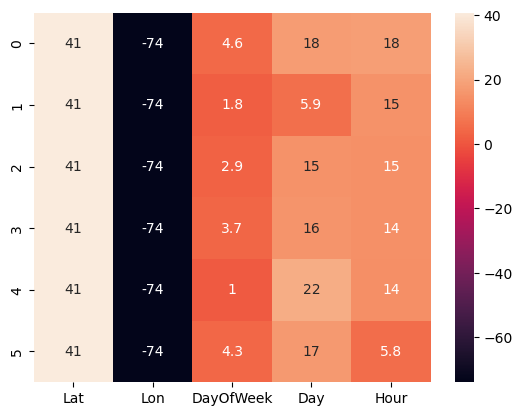

In [20]:
# Let's visualize on a heatmap
sns.heatmap(pd.DataFrame(cluster_centers, columns=labels),  annot=True)

In [21]:
df_sample['k_means_cluster'] = kmeans.predict(X)
df_sample.head()

Lat      Lon  DayOfWeek  Day  Hour  k_means_cluster
738428  40.6931 -73.9694          5   13    17                0
668467  40.7310 -73.9954          2    3    23                1
99550   40.7738 -73.8724          1    9     9                3
703954  40.6742 -73.9316          0    8    19                1
982139  40.8633 -73.9267          3   25     8                3

In [22]:
fig = px.scatter_mapbox(
        df_sample,
        lat="Lat",
        lon="Lon",
        color="k_means_cluster",
        mapbox_style="carto-positron"
)

fig.show()

### Apply DBSCAN 🚀🚀

In [98]:
# DBSCAN
db = DBSCAN(eps=0.1, min_samples=8, metric="manhattan", algorithm="auto")

# Fit & predict labels
db.fit_predict(X)
np.unique(db.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177], dtype=

In [99]:
db_df_sample = df_sample.drop(["k_means_cluster"], axis=1)
db_df_sample["dbscan_cluster"] = db.labels_
db_df_sample_hours = db_df_sample.sort_values(by="Hour")

# scattermapbox
fig = px.scatter_mapbox(db_df_sample_hours[db_df_sample_hours.dbscan_cluster != -1], lat='Lat', lon='Lon', color='dbscan_cluster', zoom=10, height=500, hover_data=['DayOfWeek'], animation_frame="Hour")
fig.update_layout(mapbox_style="carto-positron")

fig.show()

In [100]:
db_df_sample_days = db_df_sample.sort_values(by="DayOfWeek")

# scattermapbox
fig = px.scatter_mapbox(db_df_sample_days[db_df_sample_days.dbscan_cluster != -1], lat='Lat', lon='Lon', color='dbscan_cluster', zoom=10, height=500, animation_frame="DayOfWeek", hover_data="Hour")
fig.update_layout(mapbox_style="carto-positron")

fig.show()